## Input Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('../Dataset/full_feature.csv')
df.head(3)

,originalRate,size,baseOccupancy,maxChildOccupancy,maxChildAge,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,starRating,...,PARK,HOSPITAL,MUSEUM,GALLERY,PLACE_OF_WORSHIP,TRAIN_STATION,ZOO,ENTERTAINMENT,GARDEN.1,THEATER
0,1227273,46.0,3,1,5,1,1,1,0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,596694,31.0,2,1,5,0,1,1,0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1450413,52.0,2,1,5,1,1,1,1,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(4869, 321)

### Data Distribution

#### OriginalRate Distribution

Original rate maximum value : 60000000
Original rate miimum value : 40313


<Figure size 1600x800 with 0 Axes>

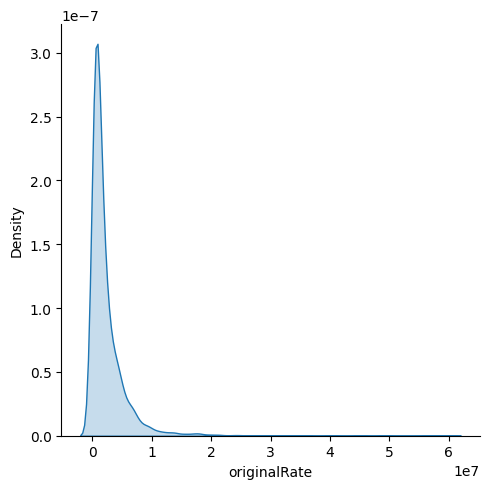

In [4]:
# MaxMin OriginalRate
print(f'Original rate maximum value : {df.originalRate.max()}')
print(f'Original rate miimum value : {df.originalRate.min()}')

# OriginalRate Distribution
plt.figure(figsize=(20, 10), dpi=80)
sns.displot(df,x="originalRate", kind="kde", fill=True)
plt.show()

In [5]:
# remove outlier with standard deviation
def std_outlier(df, col):
    std = df[col].std()
    mean = df[col].mean()
    return df[(df[col] < mean + 3 * std) & (df[col] > mean - 3 * std)]


In [6]:
# Remove outlier in OriginalRate
df_len = len(df)
df = std_outlier(df, 'originalRate')
df_len = df_len - len(df)
print(f'Deleted row : {df_len}')
print(df.shape)

Deleted row : 84
(4785, 321)


<Figure size 1600x800 with 0 Axes>

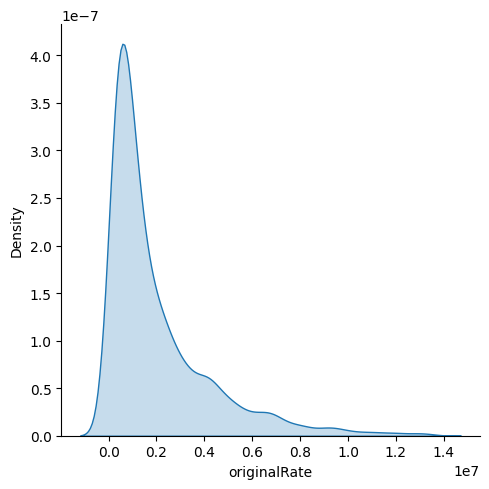

In [7]:
# OriginalRate Distribution after removing outlier
plt.figure(figsize=(20, 10), dpi=80)
sns.displot(df,x="originalRate", kind="kde", fill=True)
plt.show()

In [8]:
# # Remove outlier in OriginalRate
# df_len = len(df)
# df = std_outlier(df, 'originalRate')
# df_len = df_len - len(df)
# print(f'Deleted row : {df_len}')
# print(df.shape)

In [9]:
# # OriginalRate Distribution after removing outlier
# plt.figure(figsize=(20, 10), dpi=80)
# sns.displot(df,x="originalRate", kind="kde", fill=True)
# plt.show()

#### OriginalRate based on starRating

<Figure size 4800x1600 with 0 Axes>

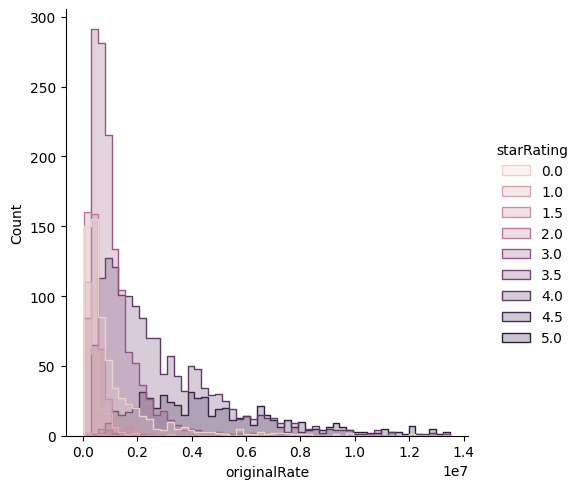

In [10]:
plt.figure(figsize=(30, 10), dpi=160)
sns.displot(df,x="originalRate", hue='starRating' , element="step", fill=True)
plt.show()

In [11]:
df.starRating.value_counts()

4.0    1506
3.0    1368
0.0     644
5.0     591
2.0     432
1.0     218
3.5      16
4.5       7
1.5       3
Name: starRating, dtype: int64

<Figure size 4800x1600 with 0 Axes>

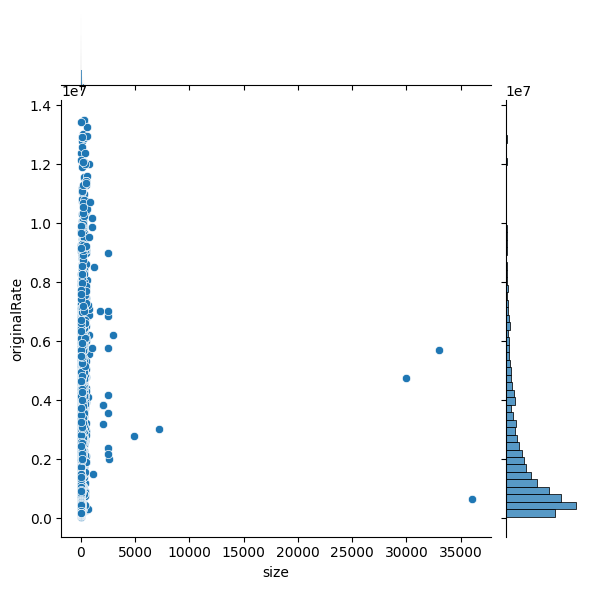

In [12]:
plt.figure(figsize=(30, 10), dpi=160)
sns.jointplot(data=df, x='size', y='originalRate')
plt.show()

In [13]:
df_len = len(df)
df = std_outlier(df, 'size')
df_len = df_len - len(df)
print(f'Deleted row : {df_len}')
print(df.shape)

Deleted row : 6
(4779, 321)


<Figure size 4800x1600 with 0 Axes>

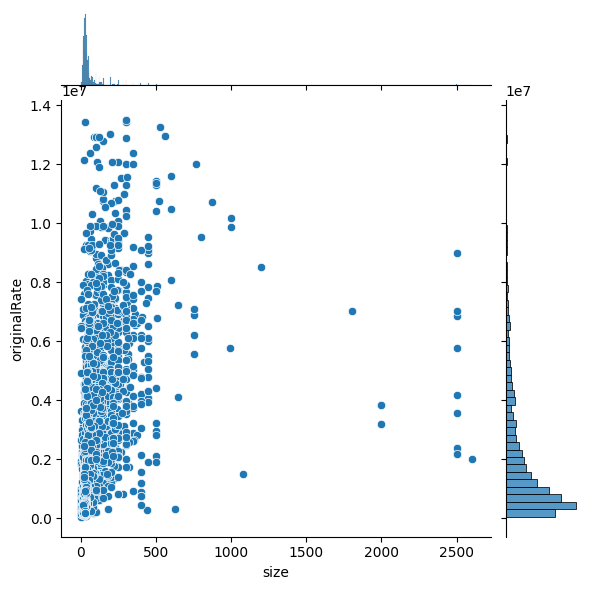

In [14]:
plt.figure(figsize=(30, 10), dpi=160)
sns.jointplot(data=df, x='size', y='originalRate')
plt.show()

In [15]:
df_len = len(df)
df = std_outlier(df, 'size')
df_len = df_len - len(df)
print(f'Deleted row : {df_len}')
print(df.shape)

Deleted row : 34
(4745, 321)


<Figure size 4800x1600 with 0 Axes>

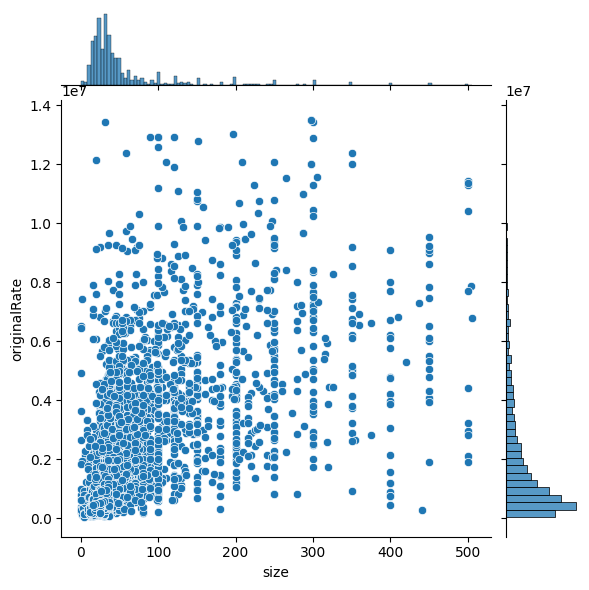

In [16]:
plt.figure(figsize=(30, 10), dpi=160)
sns.jointplot(data=df, x='size', y='originalRate')
plt.show()

In [17]:
df.to_csv('../Dataset/clean_feature.csv', index=False)